# 1. Count barley pangenome gene duplication and deletion; for retention rate analyses

# 2. generate gene pairs for homologous gene for kaks calculation, match with gene duplication type

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#data="pangenome_matrix.xlsx"
#data = "pangenome_matrix_t0.tr.csv"
data = "pangenome_matrix_genes_t0.tr.tab"

In [3]:
df=pd.read_csv(data,header=0,delimiter= "\t")
df.head()

,source:/media/hhd1/Ricky/get_homo/barley/clusters_cds_t3,Barke.cds.fasta.nucl,Clipper.V1.cds.fasta.nucl,Golden_Promise.cds.fasta.nucl,Hockett.cds.fasta.nucl,Igri.cds.fasta.nucl,Morex.cds.fasta.nucl,RGT_Planet.cds.fasta.nucl,Stirling.V1.cds.fasta.nucl,Unnamed: 9
0,1_Horvu_BARKE_1H01G243000.1.fna,"Horvu_BARKE_1H01G243000.1,","HORVU.Clipper.r1.1HG016440.mRNA1,","Horvu_GOLDEN_1H01G192000.1,","Horvu_HOCKETT_1H01G216100.1,","Horvu_IGRI_1H01G229700.1,","Horvu_MOREX_1H01G240300.1,","Horvu_PLANET_1H01G234500.1,","HORVU.Stirling.r1.1HG016530.mRNA1,",NaN
1,2_Horvu_BARKE_5H01G280000.1.fna,"Horvu_BARKE_5H01G280000.1,","HORVU.Clipper.r1.5HG020330.mRNA1,","Horvu_GOLDEN_5H01G243900.1,","Horvu_HOCKETT_5H01G257300.1,","Horvu_IGRI_5H01G271300.1,","Horvu_MOREX_5H01G284200.1,","Horvu_PLANET_5H01G273800.1,","HORVU.Stirling.r1.5HG019870.mRNA1,",NaN
2,3_Horvu_BARKE_2H01G731300.1.fna,"Horvu_BARKE_2H01G731300.1,","HORVU.Clipper.r1.2HG055950.mRNA1,","Horvu_GOLDEN_2H01G666000.1,","Horvu_HOCKETT_2H01G687400.1,","Horvu_IGRI_2H01G719600.1,","Horvu_MOREX_2H01G748500.1,","Horvu_PLANET_2H01G723200.1,","HORVU.Stirling.r1.2HG056860.mRNA1,",NaN
3,4_Horvu_BARKE_6H01G286000.1.fna,"Horvu_BARKE_6H01G286000.1,",-,"Horvu_GOLDEN_6H01G249900.1,","Horvu_HOCKETT_4H01G181900.1,","Horvu_IGRI_6H01G276900.1,","Horvu_MOREX_6H01G294100.1,","Horvu_PLANET_6H01G281300.1,",-,NaN
4,5_Horvu_BARKE_1H01G347700.1.fna,"Horvu_BARKE_1H01G347700.1,","HORVU.Clipper.r1.1HG024240.mRNA1,","Horvu_GOLDEN_1H01G292800.1,","Horvu_HOCKETT_1H01G319200.1,",-,"Horvu_MOREX_1H01G348900.1,","Horvu_PLANET_1H01G338400.1,","HORVU.Stirling.r1.1HG024380.mRNA1,",NaN


In [4]:
## filter var columns
cols = df.columns.to_list()[1:-1]
df = df[cols]
df.head()

,Barke.cds.fasta.nucl,Clipper.V1.cds.fasta.nucl,Golden_Promise.cds.fasta.nucl,Hockett.cds.fasta.nucl,Igri.cds.fasta.nucl,Morex.cds.fasta.nucl,RGT_Planet.cds.fasta.nucl,Stirling.V1.cds.fasta.nucl
0,"Horvu_BARKE_1H01G243000.1,","HORVU.Clipper.r1.1HG016440.mRNA1,","Horvu_GOLDEN_1H01G192000.1,","Horvu_HOCKETT_1H01G216100.1,","Horvu_IGRI_1H01G229700.1,","Horvu_MOREX_1H01G240300.1,","Horvu_PLANET_1H01G234500.1,","HORVU.Stirling.r1.1HG016530.mRNA1,"
1,"Horvu_BARKE_5H01G280000.1,","HORVU.Clipper.r1.5HG020330.mRNA1,","Horvu_GOLDEN_5H01G243900.1,","Horvu_HOCKETT_5H01G257300.1,","Horvu_IGRI_5H01G271300.1,","Horvu_MOREX_5H01G284200.1,","Horvu_PLANET_5H01G273800.1,","HORVU.Stirling.r1.5HG019870.mRNA1,"
2,"Horvu_BARKE_2H01G731300.1,","HORVU.Clipper.r1.2HG055950.mRNA1,","Horvu_GOLDEN_2H01G666000.1,","Horvu_HOCKETT_2H01G687400.1,","Horvu_IGRI_2H01G719600.1,","Horvu_MOREX_2H01G748500.1,","Horvu_PLANET_2H01G723200.1,","HORVU.Stirling.r1.2HG056860.mRNA1,"
3,"Horvu_BARKE_6H01G286000.1,",-,"Horvu_GOLDEN_6H01G249900.1,","Horvu_HOCKETT_4H01G181900.1,","Horvu_IGRI_6H01G276900.1,","Horvu_MOREX_6H01G294100.1,","Horvu_PLANET_6H01G281300.1,",-
4,"Horvu_BARKE_1H01G347700.1,","HORVU.Clipper.r1.1HG024240.mRNA1,","Horvu_GOLDEN_1H01G292800.1,","Horvu_HOCKETT_1H01G319200.1,",-,"Horvu_MOREX_1H01G348900.1,","Horvu_PLANET_1H01G338400.1,","HORVU.Stirling.r1.1HG024380.mRNA1,"


In [5]:
newcols = df.columns.str.replace(".cds.fasta.nucl","").str.upper()

/opt/anaconda3/envs/jupyter_seaborn/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [6]:
df.columns = newcols
df.head()

,BARKE,CLIPPER.V1,GOLDEN_PROMISE,HOCKETT,IGRI,MOREX,RGT_PLANET,STIRLING.V1
0,"Horvu_BARKE_1H01G243000.1,","HORVU.Clipper.r1.1HG016440.mRNA1,","Horvu_GOLDEN_1H01G192000.1,","Horvu_HOCKETT_1H01G216100.1,","Horvu_IGRI_1H01G229700.1,","Horvu_MOREX_1H01G240300.1,","Horvu_PLANET_1H01G234500.1,","HORVU.Stirling.r1.1HG016530.mRNA1,"
1,"Horvu_BARKE_5H01G280000.1,","HORVU.Clipper.r1.5HG020330.mRNA1,","Horvu_GOLDEN_5H01G243900.1,","Horvu_HOCKETT_5H01G257300.1,","Horvu_IGRI_5H01G271300.1,","Horvu_MOREX_5H01G284200.1,","Horvu_PLANET_5H01G273800.1,","HORVU.Stirling.r1.5HG019870.mRNA1,"
2,"Horvu_BARKE_2H01G731300.1,","HORVU.Clipper.r1.2HG055950.mRNA1,","Horvu_GOLDEN_2H01G666000.1,","Horvu_HOCKETT_2H01G687400.1,","Horvu_IGRI_2H01G719600.1,","Horvu_MOREX_2H01G748500.1,","Horvu_PLANET_2H01G723200.1,","HORVU.Stirling.r1.2HG056860.mRNA1,"
3,"Horvu_BARKE_6H01G286000.1,",-,"Horvu_GOLDEN_6H01G249900.1,","Horvu_HOCKETT_4H01G181900.1,","Horvu_IGRI_6H01G276900.1,","Horvu_MOREX_6H01G294100.1,","Horvu_PLANET_6H01G281300.1,",-
4,"Horvu_BARKE_1H01G347700.1,","HORVU.Clipper.r1.1HG024240.mRNA1,","Horvu_GOLDEN_1H01G292800.1,","Horvu_HOCKETT_1H01G319200.1,",-,"Horvu_MOREX_1H01G348900.1,","Horvu_PLANET_1H01G338400.1,","HORVU.Stirling.r1.1HG024380.mRNA1,"


In [7]:
##modify Clipper and Stirling Gene IDs
df["CLIPPER.V1"] = df["CLIPPER.V1"].str.replace("mRNA","")
df["CLIPPER.V1"] = df["CLIPPER.V1"].str.replace(".Clipper.r1.","_Clipper_")
df["STIRLING.V1"] = df["STIRLING.V1"].str.replace("mRNA","")
df["STIRLING.V1"] = df["STIRLING.V1"].str.replace(".Stirling.r1.","_Stirling_")
df.head()

/opt/anaconda3/envs/jupyter_seaborn/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/envs/jupyter_seaborn/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  """


,BARKE,CLIPPER.V1,GOLDEN_PROMISE,HOCKETT,IGRI,MOREX,RGT_PLANET,STIRLING.V1
0,"Horvu_BARKE_1H01G243000.1,","HORVU_Clipper_1HG016440.1,","Horvu_GOLDEN_1H01G192000.1,","Horvu_HOCKETT_1H01G216100.1,","Horvu_IGRI_1H01G229700.1,","Horvu_MOREX_1H01G240300.1,","Horvu_PLANET_1H01G234500.1,","HORVU_Stirling_1HG016530.1,"
1,"Horvu_BARKE_5H01G280000.1,","HORVU_Clipper_5HG020330.1,","Horvu_GOLDEN_5H01G243900.1,","Horvu_HOCKETT_5H01G257300.1,","Horvu_IGRI_5H01G271300.1,","Horvu_MOREX_5H01G284200.1,","Horvu_PLANET_5H01G273800.1,","HORVU_Stirling_5HG019870.1,"
2,"Horvu_BARKE_2H01G731300.1,","HORVU_Clipper_2HG055950.1,","Horvu_GOLDEN_2H01G666000.1,","Horvu_HOCKETT_2H01G687400.1,","Horvu_IGRI_2H01G719600.1,","Horvu_MOREX_2H01G748500.1,","Horvu_PLANET_2H01G723200.1,","HORVU_Stirling_2HG056860.1,"
3,"Horvu_BARKE_6H01G286000.1,",-,"Horvu_GOLDEN_6H01G249900.1,","Horvu_HOCKETT_4H01G181900.1,","Horvu_IGRI_6H01G276900.1,","Horvu_MOREX_6H01G294100.1,","Horvu_PLANET_6H01G281300.1,",-
4,"Horvu_BARKE_1H01G347700.1,","HORVU_Clipper_1HG024240.1,","Horvu_GOLDEN_1H01G292800.1,","Horvu_HOCKETT_1H01G319200.1,",-,"Horvu_MOREX_1H01G348900.1,","Horvu_PLANET_1H01G338400.1,","HORVU_Stirling_1HG024380.1,"


In [8]:
#count empty cells for each variety
for col in df.columns:
    print(col, df[col].str.count("-").sum())

BARKE 1344
CLIPPER.V1 9807
GOLDEN_PROMISE 1922
HOCKETT 1557
IGRI 1839
MOREX 1821
RGT_PLANET 1462
STIRLING.V1 9388


In [9]:
# for each row, count how many empty, put in last column
df_T = df.T
count_list = []
for col in df_T.columns:
    count = df_T[col].str.count("-").sum()
    count_list.append(count)

In [10]:
df["count"] = count_list

In [11]:
df.head()

,BARKE,CLIPPER.V1,GOLDEN_PROMISE,HOCKETT,IGRI,MOREX,RGT_PLANET,STIRLING.V1,count
0,"Horvu_BARKE_1H01G243000.1,","HORVU_Clipper_1HG016440.1,","Horvu_GOLDEN_1H01G192000.1,","Horvu_HOCKETT_1H01G216100.1,","Horvu_IGRI_1H01G229700.1,","Horvu_MOREX_1H01G240300.1,","Horvu_PLANET_1H01G234500.1,","HORVU_Stirling_1HG016530.1,",0
1,"Horvu_BARKE_5H01G280000.1,","HORVU_Clipper_5HG020330.1,","Horvu_GOLDEN_5H01G243900.1,","Horvu_HOCKETT_5H01G257300.1,","Horvu_IGRI_5H01G271300.1,","Horvu_MOREX_5H01G284200.1,","Horvu_PLANET_5H01G273800.1,","HORVU_Stirling_5HG019870.1,",0
2,"Horvu_BARKE_2H01G731300.1,","HORVU_Clipper_2HG055950.1,","Horvu_GOLDEN_2H01G666000.1,","Horvu_HOCKETT_2H01G687400.1,","Horvu_IGRI_2H01G719600.1,","Horvu_MOREX_2H01G748500.1,","Horvu_PLANET_2H01G723200.1,","HORVU_Stirling_2HG056860.1,",0
3,"Horvu_BARKE_6H01G286000.1,",-,"Horvu_GOLDEN_6H01G249900.1,","Horvu_HOCKETT_4H01G181900.1,","Horvu_IGRI_6H01G276900.1,","Horvu_MOREX_6H01G294100.1,","Horvu_PLANET_6H01G281300.1,",-,2
4,"Horvu_BARKE_1H01G347700.1,","HORVU_Clipper_1HG024240.1,","Horvu_GOLDEN_1H01G292800.1,","Horvu_HOCKETT_1H01G319200.1,",-,"Horvu_MOREX_1H01G348900.1,","Horvu_PLANET_1H01G338400.1,","HORVU_Stirling_1HG024380.1,",1


In [12]:
DF = df.replace('-', np.nan)

In [13]:
DF.head()

,BARKE,CLIPPER.V1,GOLDEN_PROMISE,HOCKETT,IGRI,MOREX,RGT_PLANET,STIRLING.V1,count
0,"Horvu_BARKE_1H01G243000.1,","HORVU_Clipper_1HG016440.1,","Horvu_GOLDEN_1H01G192000.1,","Horvu_HOCKETT_1H01G216100.1,","Horvu_IGRI_1H01G229700.1,","Horvu_MOREX_1H01G240300.1,","Horvu_PLANET_1H01G234500.1,","HORVU_Stirling_1HG016530.1,",0
1,"Horvu_BARKE_5H01G280000.1,","HORVU_Clipper_5HG020330.1,","Horvu_GOLDEN_5H01G243900.1,","Horvu_HOCKETT_5H01G257300.1,","Horvu_IGRI_5H01G271300.1,","Horvu_MOREX_5H01G284200.1,","Horvu_PLANET_5H01G273800.1,","HORVU_Stirling_5HG019870.1,",0
2,"Horvu_BARKE_2H01G731300.1,","HORVU_Clipper_2HG055950.1,","Horvu_GOLDEN_2H01G666000.1,","Horvu_HOCKETT_2H01G687400.1,","Horvu_IGRI_2H01G719600.1,","Horvu_MOREX_2H01G748500.1,","Horvu_PLANET_2H01G723200.1,","HORVU_Stirling_2HG056860.1,",0
3,"Horvu_BARKE_6H01G286000.1,",NaN,"Horvu_GOLDEN_6H01G249900.1,","Horvu_HOCKETT_4H01G181900.1,","Horvu_IGRI_6H01G276900.1,","Horvu_MOREX_6H01G294100.1,","Horvu_PLANET_6H01G281300.1,",NaN,2
4,"Horvu_BARKE_1H01G347700.1,","HORVU_Clipper_1HG024240.1,","Horvu_GOLDEN_1H01G292800.1,","Horvu_HOCKETT_1H01G319200.1,",NaN,"Horvu_MOREX_1H01G348900.1,","Horvu_PLANET_1H01G338400.1,","HORVU_Stirling_1HG024380.1,",1


In [14]:
## remove last "," symbol
DF = DF.apply(lambda x: x.astype(str).str.strip(','))

In [15]:
DF.info() ##by default pandas store string data as object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34879 entries, 0 to 34878
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   BARKE           34879 non-null  object
 1   CLIPPER.V1      34879 non-null  object
 2   GOLDEN_PROMISE  34879 non-null  object
 3   HOCKETT         34879 non-null  object
 4   IGRI            34879 non-null  object
 5   MOREX           34879 non-null  object
 6   RGT_PLANET      34879 non-null  object
 7   STIRLING.V1     34879 non-null  object
 8   count           34879 non-null  object
dtypes: object(9)
memory usage: 2.4+ MB


In [16]:
DF = DF[DF.columns.to_list()[:-1]] # have to drop last count row for merge gene id in next step
DF.head()

,BARKE,CLIPPER.V1,GOLDEN_PROMISE,HOCKETT,IGRI,MOREX,RGT_PLANET,STIRLING.V1
0,Horvu_BARKE_1H01G243000.1,HORVU_Clipper_1HG016440.1,Horvu_GOLDEN_1H01G192000.1,Horvu_HOCKETT_1H01G216100.1,Horvu_IGRI_1H01G229700.1,Horvu_MOREX_1H01G240300.1,Horvu_PLANET_1H01G234500.1,HORVU_Stirling_1HG016530.1
1,Horvu_BARKE_5H01G280000.1,HORVU_Clipper_5HG020330.1,Horvu_GOLDEN_5H01G243900.1,Horvu_HOCKETT_5H01G257300.1,Horvu_IGRI_5H01G271300.1,Horvu_MOREX_5H01G284200.1,Horvu_PLANET_5H01G273800.1,HORVU_Stirling_5HG019870.1
2,Horvu_BARKE_2H01G731300.1,HORVU_Clipper_2HG055950.1,Horvu_GOLDEN_2H01G666000.1,Horvu_HOCKETT_2H01G687400.1,Horvu_IGRI_2H01G719600.1,Horvu_MOREX_2H01G748500.1,Horvu_PLANET_2H01G723200.1,HORVU_Stirling_2HG056860.1
3,Horvu_BARKE_6H01G286000.1,nan,Horvu_GOLDEN_6H01G249900.1,Horvu_HOCKETT_4H01G181900.1,Horvu_IGRI_6H01G276900.1,Horvu_MOREX_6H01G294100.1,Horvu_PLANET_6H01G281300.1,nan
4,Horvu_BARKE_1H01G347700.1,HORVU_Clipper_1HG024240.1,Horvu_GOLDEN_1H01G292800.1,Horvu_HOCKETT_1H01G319200.1,nan,Horvu_MOREX_1H01G348900.1,Horvu_PLANET_1H01G338400.1,HORVU_Stirling_1HG024380.1


In [17]:
DF.columns.to_list()

['BARKE',
 'CLIPPER.V1',
 'GOLDEN_PROMISE',
 'HOCKETT',
 'IGRI',
 'MOREX',
 'RGT_PLANET',
 'STIRLING.V1']

In [17]:
# move Morex to first column, that way it would most likely be used as reference
ordered_cols = [ 'MOREX','BARKE',  'GOLDEN_PROMISE',
 'CLIPPER.V1',
 'HOCKETT',
 'IGRI',
 'RGT_PLANET',
 'STIRLING.V1']

DF = DF[ordered_cols]

In [18]:
#merge gene ID in each row, add to new column Merged
DF['Merged'] = DF.apply(lambda x: ','.join(x.dropna().astype(str)),axis=1)
DF.head()

,MOREX,BARKE,GOLDEN_PROMISE,CLIPPER.V1,HOCKETT,IGRI,RGT_PLANET,STIRLING.V1,Merged
0,Horvu_MOREX_1H01G240300.1,Horvu_BARKE_1H01G243000.1,Horvu_GOLDEN_1H01G192000.1,HORVU.Clipper.r1.1HG016440.mRNA1,Horvu_HOCKETT_1H01G216100.1,Horvu_IGRI_1H01G229700.1,Horvu_PLANET_1H01G234500.1,HORVU.Stirling.r1.1HG016530.mRNA1,"Horvu_MOREX_1H01G240300.1,Horvu_BARKE_1H01G243..."
1,Horvu_MOREX_5H01G284200.1,Horvu_BARKE_5H01G280000.1,Horvu_GOLDEN_5H01G243900.1,HORVU.Clipper.r1.5HG020330.mRNA1,Horvu_HOCKETT_5H01G257300.1,Horvu_IGRI_5H01G271300.1,Horvu_PLANET_5H01G273800.1,HORVU.Stirling.r1.5HG019870.mRNA1,"Horvu_MOREX_5H01G284200.1,Horvu_BARKE_5H01G280..."
2,Horvu_MOREX_2H01G748500.1,Horvu_BARKE_2H01G731300.1,Horvu_GOLDEN_2H01G666000.1,HORVU.Clipper.r1.2HG055950.mRNA1,Horvu_HOCKETT_2H01G687400.1,Horvu_IGRI_2H01G719600.1,Horvu_PLANET_2H01G723200.1,HORVU.Stirling.r1.2HG056860.mRNA1,"Horvu_MOREX_2H01G748500.1,Horvu_BARKE_2H01G731..."
3,Horvu_MOREX_6H01G294100.1,Horvu_BARKE_6H01G286000.1,Horvu_GOLDEN_6H01G249900.1,nan,Horvu_HOCKETT_4H01G181900.1,Horvu_IGRI_6H01G276900.1,Horvu_PLANET_6H01G281300.1,nan,"Horvu_MOREX_6H01G294100.1,Horvu_BARKE_6H01G286..."
4,Horvu_MOREX_1H01G348900.1,Horvu_BARKE_1H01G347700.1,Horvu_GOLDEN_1H01G292800.1,HORVU.Clipper.r1.1HG024240.mRNA1,Horvu_HOCKETT_1H01G319200.1,nan,Horvu_PLANET_1H01G338400.1,HORVU.Stirling.r1.1HG024380.mRNA1,"Horvu_MOREX_1H01G348900.1,Horvu_BARKE_1H01G347..."


In [60]:
## Generate gene pairs for KaKs
#instead of using Morex as reference, just use first gene in each row as reference
with open("ricky_gene_pairs_for_kaks_removeNA.txt","w") as f:
    for index,row in DF.iterrows():
        row_id = "Row"+str(index)
        #merge all gene id in a list
        row_list = row["Merged"].split(",")
        row_list = [x for x in row_list if x != "nan"] # remove nan
        if len(row_list)>1:
            for gene in row_list[1:]:
                f.write("%s\t%s\t%s\n" % (row_id, row_list[0], gene))

## match row gene pairs with kaks results

In [19]:
df_kaks = pd.read_csv("./2vars_plotting/merged_kaks_lines_header.kaks",header=0,sep="\t")
df_kaks.head(10)

,Sequence,Method,Ka,Ks,Ka/Ks,P-Value(Fisher),Length,S-Sites,N-Sites,Fold-Sites(0:2:4),...,N-Substitutions,Fold-S-Substitutions(0:2:4),Fold-N-Substitutions(0:2:4),Divergence-Time,Substitution-Rate-Ratio(rTC:rAG:rTA:rCG:rTG:rCA/rCA),GC(1:2:3),ML-Score,AICc,Akaike-Weight,Model
0,Horvu_BARKE_2H01G006500-Horvu_GOLDEN_Un01G012100,MA,NaN,NaN,NaN,NaN,627,148.031,478.969,NaN,...,NaN,NaN,NaN,NaN,0.46035:0.42266:0.47055:0.462562:0.383837:1,0.511962(0.550239:0.411483:0.574163),-852.566,NaN,NaN,NaN
1,Horvu_BARKE_2H01G006500-Horvu_HOCKETT_2H01G004700,MA,0.001933,0.000039,50.000,0.0,627,111.953,515.047,NaN,...,0.995672,NaN,NaN,0.001595,0.01:0.01:6.35491:7.76355:0.01:1,0.511962(0.550239:0.411483:0.574163),-860.085,NaN,NaN,NaN
2,Horvu_BARKE_2H01G006500-Horvu_HOCKETT_2H01G004800,MA,0.000010,0.009668,0.001,0.0,441,103.097,337.903,NaN,...,0.003267,NaN,NaN,0.002268,18.1848:30:18.2319:18.2319:0.01:1,0.393424(0.537415:0.285714:0.357143),-583.939,NaN,NaN,NaN
3,Horvu_BARKE_2H01G006500-Horvu_IGRI_2H01G002900,MA,0.001933,0.000039,50.000,0.0,627,111.953,515.047,NaN,...,0.995672,NaN,NaN,0.001595,0.01:0.01:6.35491:7.76355:0.01:1,0.511962(0.550239:0.411483:0.574163),-860.085,NaN,NaN,NaN
4,Horvu_BARKE_2H01G006500-Horvu_PLANET_2H01G003000,MA,0.000260,0.000005,50.000,0.0,4503,676.346,3826.650,NaN,...,0.996478,NaN,NaN,0.000222,0.01:0.01:0.01:0.01:8.02027:1,0.459805(0.558961:0.362092:0.458361),-5961.930,NaN,NaN,NaN
5,Horvu_BARKE_2H01G009300-Horvu_GOLDEN_2H01G006000,MA,NaN,NaN,NaN,NaN,4422,1026.380,3395.620,NaN,...,NaN,NaN,NaN,NaN,0.497417:0.465472:0.502897:0.49393:0.362093:1,0.457033(0.546133:0.365672:0.459294),-5857.760,NaN,NaN,NaN
6,Horvu_BARKE_2H01G009300-Horvu_HOCKETT_2H01G007800,MA,NaN,NaN,NaN,NaN,4611,1078.470,3532.530,NaN,...,NaN,NaN,NaN,NaN,0.497418:0.465468:0.502898:0.493923:0.362087:1,0.464975(0.549122:0.372804:0.472999),-6124.810,NaN,NaN,NaN
7,Horvu_BARKE_2H01G009300-Horvu_PLANET_2H01G005700,MA,NaN,NaN,NaN,NaN,4611,1078.470,3532.530,NaN,...,NaN,NaN,NaN,NaN,0.497418:0.465468:0.502898:0.493923:0.362087:1,0.464975(0.549122:0.372804:0.472999),-6124.810,NaN,NaN,NaN
8,Horvu_BARKE_2H01G126000-Horvu_GOLDEN_2H01G100800,MA,NaN,NaN,NaN,NaN,4479,973.382,3505.620,NaN,...,NaN,NaN,NaN,NaN,0.497421:0.465472:0.502898:0.493927:0.362125:1,0.447198(0.514401:0.383121:0.444072),-5971.850,NaN,NaN,NaN
9,Horvu_BARKE_2H01G126000-Horvu_HOCKETT_2H01G102400,MA,NaN,NaN,NaN,NaN,4479,973.382,3505.620,NaN,...,NaN,NaN,NaN,NaN,0.497421:0.465472:0.502898:0.493927:0.362125:1,0.447198(0.514401:0.383121:0.444072),-5971.850,NaN,NaN,NaN


In [26]:
##modify clipper and stirling gene ids
df_kaks["Sequence"] = df_kaks["Sequence"].str.replace("mRNA","")
df_kaks["Sequence"] = df_kaks["Sequence"].str.replace(".Clipper.r1.","_Clipper_")
df_kaks["Sequence"] = df_kaks["Sequence"].str.replace(".Stirling.r1.","_Stirling_")
df_kaks.tail()

/opt/anaconda3/envs/jupyter_seaborn/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/envs/jupyter_seaborn/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.


,Sequence,Method,Ka,Ks,Ka/Ks,P-Value(Fisher),Length,S-Sites,N-Sites,Fold-Sites(0:2:4),...,N-Substitutions,Fold-S-Substitutions(0:2:4),Fold-N-Substitutions(0:2:4),Divergence-Time,Substitution-Rate-Ratio(rTC:rAG:rTA:rCG:rTG:rCA/rCA),GC(1:2:3),ML-Score,AICc,Akaike-Weight,Model
283484,Horvu_MOREX_Un01G100700-HORVU_Stirling_2HG004590,MA,0.225756,0.394711,0.571952,0.057886,210,43.4343,166.566,NaN,...,30.22140,NaN,NaN,0.260701,1.6561:1.90794:2.75792:3.09463:4.72517:1,0.42619(0.478571:0.507143:0.292857),-434.012,NaN,NaN,NaN
283485,Horvu_MOREX_Un01G102700-HORVU_Clipper_2HG026410,MA,0.011346,0.000227,50.000000,0.365711,231,55.2908,175.709,NaN,...,1.98749,NaN,NaN,0.008685,30:9.80953:9.45166:9.45166:0.01:1,0.402597(0.467532:0.402597:0.337662),-313.001,NaN,NaN,NaN
283486,Horvu_MOREX_Un01G102700-HORVU_Stirling_2HG026860,MA,0.011346,0.000227,50.000000,0.365711,231,55.2908,175.709,NaN,...,1.98749,NaN,NaN,0.008685,30:9.80953:9.45166:9.45166:0.01:1,0.402597(0.467532:0.402597:0.337662),-313.001,NaN,NaN,NaN
283487,Horvu_MOREX_Un01G104200-HORVU_Stirling_7HG025540,MA,0.043466,0.055816,0.778750,0.294465,228,43.6378,184.362,NaN,...,7.66905,NaN,NaN,0.045830,1.06673:1.17921:1.22342:1.08327:1.99502:1,0.41886(0.460526:0.348684:0.447368),-353.448,NaN,NaN,NaN
283488,Horvu_MOREX_Un01G110000-HORVU_Clipper_6HG011840,MA,NaN,NaN,NaN,NaN,192,49.1386,142.861,NaN,...,NaN,NaN,NaN,NaN,0.500636:0.462675:0.500838:0.49629:0.358532:1,0.598958(0.640625:0.546875:0.609375),-257.898,NaN,NaN,NaN


In [28]:
df_gene_pairs = pd.read_csv("ricky_gene_pairs_for_kaks_removeNA.txt",header=None,sep="\t")
df_gene_pairs.columns = ["row","gene1","gene2"]
df_gene_pairs.head(10)

,row,gene1,gene2
0,Row0,Horvu_MOREX_1H01G240300.1,Horvu_BARKE_1H01G243000.1
1,Row0,Horvu_MOREX_1H01G240300.1,Horvu_GOLDEN_1H01G192000.1
2,Row0,Horvu_MOREX_1H01G240300.1,HORVU.Clipper.r1.1HG016440.mRNA1
3,Row0,Horvu_MOREX_1H01G240300.1,Horvu_HOCKETT_1H01G216100.1
4,Row0,Horvu_MOREX_1H01G240300.1,Horvu_IGRI_1H01G229700.1
5,Row0,Horvu_MOREX_1H01G240300.1,Horvu_PLANET_1H01G234500.1
6,Row0,Horvu_MOREX_1H01G240300.1,HORVU.Stirling.r1.1HG016530.mRNA1
7,Row1,Horvu_MOREX_5H01G284200.1,Horvu_BARKE_5H01G280000.1
8,Row1,Horvu_MOREX_5H01G284200.1,Horvu_GOLDEN_5H01G243900.1
9,Row1,Horvu_MOREX_5H01G284200.1,HORVU.Clipper.r1.5HG020330.mRNA1


In [31]:
##modify clipper and stirling gene ids
for gene in ["gene1","gene2"]:
    df_gene_pairs[gene] = df_gene_pairs[gene].str.replace("mRNA","")
    df_gene_pairs[gene] = df_gene_pairs[gene].str.replace(".Clipper.r1.","_Clipper_")
    df_gene_pairs[gene] = df_gene_pairs[gene].str.replace(".Stirling.r1.","_Stirling_")
df_gene_pairs.head(10)

/opt/anaconda3/envs/jupyter_seaborn/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.
/opt/anaconda3/envs/jupyter_seaborn/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  """


,row,gene1,gene2
0,Row0,Horvu_MOREX_1H01G240300.1,Horvu_BARKE_1H01G243000.1
1,Row0,Horvu_MOREX_1H01G240300.1,Horvu_GOLDEN_1H01G192000.1
2,Row0,Horvu_MOREX_1H01G240300.1,HORVU_Clipper_1HG016440.1
3,Row0,Horvu_MOREX_1H01G240300.1,Horvu_HOCKETT_1H01G216100.1
4,Row0,Horvu_MOREX_1H01G240300.1,Horvu_IGRI_1H01G229700.1
5,Row0,Horvu_MOREX_1H01G240300.1,Horvu_PLANET_1H01G234500.1
6,Row0,Horvu_MOREX_1H01G240300.1,HORVU_Stirling_1HG016530.1
7,Row1,Horvu_MOREX_5H01G284200.1,Horvu_BARKE_5H01G280000.1
8,Row1,Horvu_MOREX_5H01G284200.1,Horvu_GOLDEN_5H01G243900.1
9,Row1,Horvu_MOREX_5H01G284200.1,HORVU_Clipper_5HG020330.1


In [32]:
df_gene_pairs["pair"] = df_gene_pairs["gene1"].str.split(".",expand=True)[0] + "-" + df_gene_pairs["gene2"].str.split(".",expand=True)[0]
df_gene_pairs.head()

,row,gene1,gene2,pair
0,Row0,Horvu_MOREX_1H01G240300.1,Horvu_BARKE_1H01G243000.1,Horvu_MOREX_1H01G240300-Horvu_BARKE_1H01G243000
1,Row0,Horvu_MOREX_1H01G240300.1,Horvu_GOLDEN_1H01G192000.1,Horvu_MOREX_1H01G240300-Horvu_GOLDEN_1H01G192000
2,Row0,Horvu_MOREX_1H01G240300.1,HORVU_Clipper_1HG016440.1,Horvu_MOREX_1H01G240300-HORVU_Clipper_1HG016440
3,Row0,Horvu_MOREX_1H01G240300.1,Horvu_HOCKETT_1H01G216100.1,Horvu_MOREX_1H01G240300-Horvu_HOCKETT_1H01G216100
4,Row0,Horvu_MOREX_1H01G240300.1,Horvu_IGRI_1H01G229700.1,Horvu_MOREX_1H01G240300-Horvu_IGRI_1H01G229700


In [33]:
##merge gene pair with kaks
df_merged = df_gene_pairs.merge(df_kaks,left_on="pair", right_on="Sequence",how="inner")
df_merged.head()

,row,gene1,gene2,pair,Sequence,Method,Ka,Ks,Ka/Ks,P-Value(Fisher),...,N-Substitutions,Fold-S-Substitutions(0:2:4),Fold-N-Substitutions(0:2:4),Divergence-Time,Substitution-Rate-Ratio(rTC:rAG:rTA:rCG:rTG:rCA/rCA),GC(1:2:3),ML-Score,AICc,Akaike-Weight,Model
0,Row0,Horvu_MOREX_1H01G240300.1,Horvu_BARKE_1H01G243000.1,Horvu_MOREX_1H01G240300-Horvu_BARKE_1H01G243000,Horvu_MOREX_1H01G240300-Horvu_BARKE_1H01G243000,MA,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.497421:0.465378:0.502935:0.493828:0.362054:1,0.428554(0.519978:0.363891:0.401792),-21209.8,NaN,NaN,NaN
1,Row0,Horvu_MOREX_1H01G240300.1,Horvu_GOLDEN_1H01G192000.1,Horvu_MOREX_1H01G240300-Horvu_GOLDEN_1H01G192000,Horvu_MOREX_1H01G240300-Horvu_GOLDEN_1H01G192000,MA,0.00007,0.000001,50.0,0.0,...,0.997316,NaN,NaN,0.000062,0.01:0.01:0.01:0.01:8.06012:1,0.428523(0.519884:0.363891:0.401792),-21219.5,NaN,NaN,NaN
2,Row0,Horvu_MOREX_1H01G240300.1,HORVU_Clipper_1HG016440.1,Horvu_MOREX_1H01G240300-HORVU_Clipper_1HG016440,Horvu_MOREX_1H01G240300-HORVU_Clipper_1HG016440,MA,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.497421:0.465378:0.502935:0.493828:0.362054:1,0.428554(0.519978:0.363891:0.401792),-21209.8,NaN,NaN,NaN
3,Row0,Horvu_MOREX_1H01G240300.1,Horvu_HOCKETT_1H01G216100.1,Horvu_MOREX_1H01G240300-Horvu_HOCKETT_1H01G216100,Horvu_MOREX_1H01G240300-Horvu_HOCKETT_1H01G216100,MA,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.497421:0.465378:0.502935:0.493828:0.362054:1,0.428554(0.519978:0.363891:0.401792),-21209.8,NaN,NaN,NaN
4,Row0,Horvu_MOREX_1H01G240300.1,Horvu_IGRI_1H01G229700.1,Horvu_MOREX_1H01G240300-Horvu_IGRI_1H01G229700,Horvu_MOREX_1H01G240300-Horvu_IGRI_1H01G229700,MA,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.497421:0.465378:0.502935:0.493828:0.362054:1,0.428554(0.519978:0.363891:0.401792),-21209.8,NaN,NaN,NaN


In [34]:
df_merged.to_csv("./2vars_plotting/row_kaks_merged.csv",index=None,sep="\t")

In [35]:
df_merged.shape

(283489, 26)

In [37]:
df_merged[df_merged["gene2"] == "HORVU_Clipper_1HG001570.1"]

,row,gene1,gene2,pair,Sequence,Method,Ka,Ks,Ka/Ks,P-Value(Fisher),...,N-Substitutions,Fold-S-Substitutions(0:2:4),Fold-N-Substitutions(0:2:4),Divergence-Time,Substitution-Rate-Ratio(rTC:rAG:rTA:rCG:rTG:rCA/rCA),GC(1:2:3),ML-Score,AICc,Akaike-Weight,Model
10987,Row1032,Horvu_BARKE_1H01G022700.1,HORVU_Clipper_1HG001570.1,Horvu_BARKE_1H01G022700-HORVU_Clipper_1HG001570,Horvu_BARKE_1H01G022700-HORVU_Clipper_1HG001570,MA,0.022481,0.027468,0.81843,0.401231,...,54.3056,NaN,NaN,0.023622,1.01866:1.01643:0.917348:1.09542:0.559124:1,0.460683(0.515508:0.37312:0.493421),-4687.23,NaN,NaN,NaN


In [36]:
df_merged.isna().sum()

row                                                          0
gene1                                                        0
gene2                                                        0
pair                                                         0
Sequence                                                     0
Method                                                       0
Ka                                                      104287
Ks                                                      104141
Ka/Ks                                                   104141
P-Value(Fisher)                                         104137
Length                                                       0
S-Sites                                                      4
N-Sites                                                      4
Fold-Sites(0:2:4)                                       283489
Substitutions                                                0
S-Substitutions                                        

In [38]:
df_kaks_mean = df_merged.groupby("row").mean()

In [39]:
df_merged.groupby("row").mean().shape

(34879, 18)

In [40]:
df_kaks_mean.head()

,Ka,Ks,Ka/Ks,P-Value(Fisher),Length,S-Sites,N-Sites,Fold-Sites(0:2:4),Substitutions,S-Substitutions,N-Substitutions,Fold-S-Substitutions(0:2:4),Fold-N-Substitutions(0:2:4),Divergence-Time,ML-Score,AICc,Akaike-Weight,Model
row,,,,,,,,,,,,,,,,,,
Row0,0.000070,0.000001,50.000000,0.000000,16068.000000,2892.820000,13175.185714,NaN,0.142857,0.002684,0.997316,NaN,NaN,0.000062,-21211.185714,NaN,NaN,NaN
Row1,0.000077,0.000002,49.720800,0.000000,15216.000000,2190.240000,13025.800000,NaN,1.000000,0.003370,0.996630,NaN,NaN,0.000066,-20202.100000,NaN,NaN,NaN
Row10,0.000401,0.001558,0.252579,0.060619,10278.857143,2333.638571,7945.218571,NaN,6.857143,3.691341,3.165801,NaN,NaN,0.000668,-13422.128571,NaN,NaN,NaN
Row100,0.001460,0.004517,0.323286,0.015900,5811.000000,1270.404286,4540.595714,NaN,5.428571,6.225497,6.441170,NaN,NaN,0.002187,-7725.404286,NaN,NaN,NaN
Row1000,0.001289,0.003817,0.337633,0.137340,3219.000000,711.392571,2507.610000,NaN,1.714286,2.808110,3.191890,NaN,NaN,0.001868,-4287.347143,NaN,NaN,NaN


In [41]:
df_count = df[["count"]]
df_count.head()

,count
0,0
1,0
2,0
3,2
4,1


In [42]:
df_count["row"] = df.index.to_list()

/opt/anaconda3/envs/jupyter_seaborn/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [71]:
df_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34879 entries, 0 to 34878
Data columns (total 2 columns):
count    34879 non-null int64
row      34879 non-null int64
dtypes: int64(2)
memory usage: 545.1 KB


In [43]:
df_count["row"] = df_count["row"].map(str) ## convert to string
df_count["row"] = "Row" + df_count["row"]

/opt/anaconda3/envs/jupyter_seaborn/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/anaconda3/envs/jupyter_seaborn/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [46]:
df_count.head()

,row,count
0,Row0,0
1,Row1,0
2,Row2,0
3,Row3,2
4,Row4,1


In [45]:
df_count = df_count[["row","count"]]

In [47]:
df_kaks_mean.reset_index(inplace=True)
df_kaks_mean.head()

,row,Ka,Ks,Ka/Ks,P-Value(Fisher),Length,S-Sites,N-Sites,Fold-Sites(0:2:4),Substitutions,S-Substitutions,N-Substitutions,Fold-S-Substitutions(0:2:4),Fold-N-Substitutions(0:2:4),Divergence-Time,ML-Score,AICc,Akaike-Weight,Model
0,Row0,0.000070,0.000001,50.000000,0.000000,16068.000000,2892.820000,13175.185714,NaN,0.142857,0.002684,0.997316,NaN,NaN,0.000062,-21211.185714,NaN,NaN,NaN
1,Row1,0.000077,0.000002,49.720800,0.000000,15216.000000,2190.240000,13025.800000,NaN,1.000000,0.003370,0.996630,NaN,NaN,0.000066,-20202.100000,NaN,NaN,NaN
2,Row10,0.000401,0.001558,0.252579,0.060619,10278.857143,2333.638571,7945.218571,NaN,6.857143,3.691341,3.165801,NaN,NaN,0.000668,-13422.128571,NaN,NaN,NaN
3,Row100,0.001460,0.004517,0.323286,0.015900,5811.000000,1270.404286,4540.595714,NaN,5.428571,6.225497,6.441170,NaN,NaN,0.002187,-7725.404286,NaN,NaN,NaN
4,Row1000,0.001289,0.003817,0.337633,0.137340,3219.000000,711.392571,2507.610000,NaN,1.714286,2.808110,3.191890,NaN,NaN,0.001868,-4287.347143,NaN,NaN,NaN


In [48]:
df_row_kaks = df_count.merge(df_kaks_mean,on="row")
df_row_kaks.head()

,row,count,Ka,Ks,Ka/Ks,P-Value(Fisher),Length,S-Sites,N-Sites,Fold-Sites(0:2:4),Substitutions,S-Substitutions,N-Substitutions,Fold-S-Substitutions(0:2:4),Fold-N-Substitutions(0:2:4),Divergence-Time,ML-Score,AICc,Akaike-Weight,Model
0,Row0,0,0.000070,0.000001,50.000000,0.000000,16068.000000,2892.820000,13175.185714,NaN,0.142857,0.002684,0.997316,NaN,NaN,0.000062,-21211.185714,NaN,NaN,NaN
1,Row1,0,0.000077,0.000002,49.720800,0.000000,15216.000000,2190.240000,13025.800000,NaN,1.000000,0.003370,0.996630,NaN,NaN,0.000066,-20202.100000,NaN,NaN,NaN
2,Row2,0,0.001727,0.003964,0.433400,0.026297,14246.571429,3481.474286,10765.114286,NaN,27.857143,14.041450,18.458550,NaN,NaN,0.002287,-19123.514286,NaN,NaN,NaN
3,Row3,2,0.000083,0.001179,12.597082,0.064438,10480.200000,2102.893400,8377.302000,NaN,1.600000,1.174139,0.825861,NaN,NaN,0.000278,-13854.964000,NaN,NaN,NaN
4,Row4,1,0.000107,0.000002,50.000000,0.000000,12585.000000,2716.890000,9868.143333,NaN,0.333333,0.006946,0.993054,NaN,NaN,0.000079,-16625.466667,NaN,NaN,NaN


In [49]:
df_row_kaks.to_csv("./2vars_plotting/df_row_kaks.csv",index=None)

## plotting ka ks values against absence gene count

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [51]:
sns.__version__

'0.11.2'

In [52]:
from matplotlib.ticker import FormatStrFormatter

In [53]:
df_row_kaks = pd.read_csv("./2vars_plotting/df_row_kaks.csv")
df_row_kaks.head()

,row,count,Ka,Ks,Ka/Ks,P-Value(Fisher),Length,S-Sites,N-Sites,Fold-Sites(0:2:4),Substitutions,S-Substitutions,N-Substitutions,Fold-S-Substitutions(0:2:4),Fold-N-Substitutions(0:2:4),Divergence-Time,ML-Score,AICc,Akaike-Weight,Model
0,Row0,0,0.000070,0.000001,50.000000,0.000000,16068.000000,2892.820000,13175.185714,NaN,0.142857,0.002684,0.997316,NaN,NaN,0.000062,-21211.185714,NaN,NaN,NaN
1,Row1,0,0.000077,0.000002,49.720800,0.000000,15216.000000,2190.240000,13025.800000,NaN,1.000000,0.003370,0.996630,NaN,NaN,0.000066,-20202.100000,NaN,NaN,NaN
2,Row2,0,0.001727,0.003964,0.433400,0.026297,14246.571429,3481.474286,10765.114286,NaN,27.857143,14.041450,18.458550,NaN,NaN,0.002287,-19123.514286,NaN,NaN,NaN
3,Row3,2,0.000083,0.001179,12.597082,0.064438,10480.200000,2102.893400,8377.302000,NaN,1.600000,1.174139,0.825861,NaN,NaN,0.000278,-13854.964000,NaN,NaN,NaN
4,Row4,1,0.000107,0.000002,50.000000,0.000000,12585.000000,2716.890000,9868.143333,NaN,0.333333,0.006946,0.993054,NaN,NaN,0.000079,-16625.466667,NaN,NaN,NaN


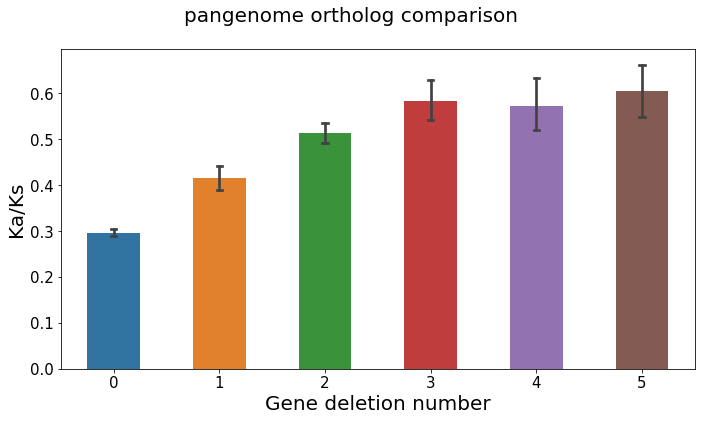

In [61]:
fig,ax=plt.subplots(figsize=(10,6))

sns.barplot(x="count",y="Ka/Ks",data=df_row_kaks[df_row_kaks["Ka/Ks"]<5],\
        capsize=0.05,)
#ax.set_xticklabels(["Background","Target"],fontsize=12)
#ax.set_yticklabels(fontsize=8)

fig.suptitle('pangenome ortholog comparison', fontsize=20)
plt.ylabel('Ka/Ks',fontsize=20)
plt.xlabel('Gene deletion number', fontsize=20)

# change bar width
for bar in ax.patches:
    x = bar.get_x()
    width = bar.get_width()
    centre = x+width/2.
    
    newwidth = 0.5
    
    bar.set_x(centre-newwidth/2.)
    bar.set_width(newwidth)

# add a horizontal line
#kwargs={"color":"red","linewidth":1,"linestyle":"--"}
#ax.axhline(1.0,**kwargs)
plt.tight_layout()
plt.show()

## add t-tests

In [41]:
from utils import *
from scipy.stats import mannwhitneyu, normaltest
from statannotations.Annotator import Annotator

In [36]:
fig.savefig("KaKs_vs_gene_deletion_number.png",dpi=300,bbox_inches="tight")

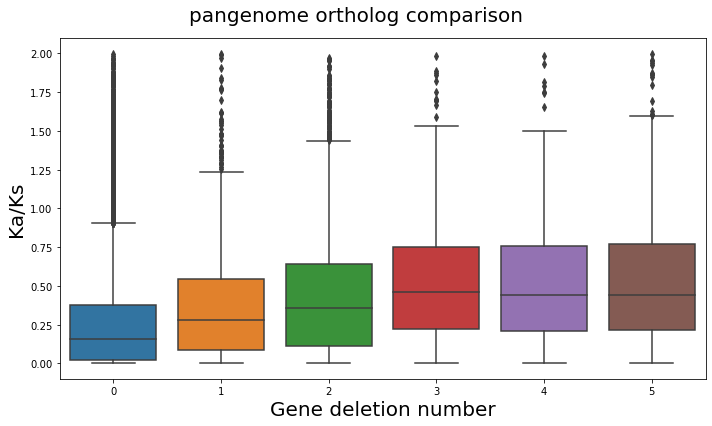

In [59]:
fig,ax=plt.subplots(figsize=(10,6))

sns.boxplot(x="count",y="Ka/Ks",data=df_row_kaks[df_row_kaks["Ka/Ks"]<2],)
#ax.set_xticklabels(["Background","Target"],fontsize=12)
#ax.set_yticklabels(fontsize=8)

fig.suptitle('pangenome ortholog comparison', fontsize=20)
plt.ylabel('Ka/Ks',fontsize=20)
plt.xlabel('Gene deletion number', fontsize=20)

plt.tight_layout()
plt.show()

In [38]:
fig.savefig("boxplot.png",dpi=300,bbox_inches="tight")

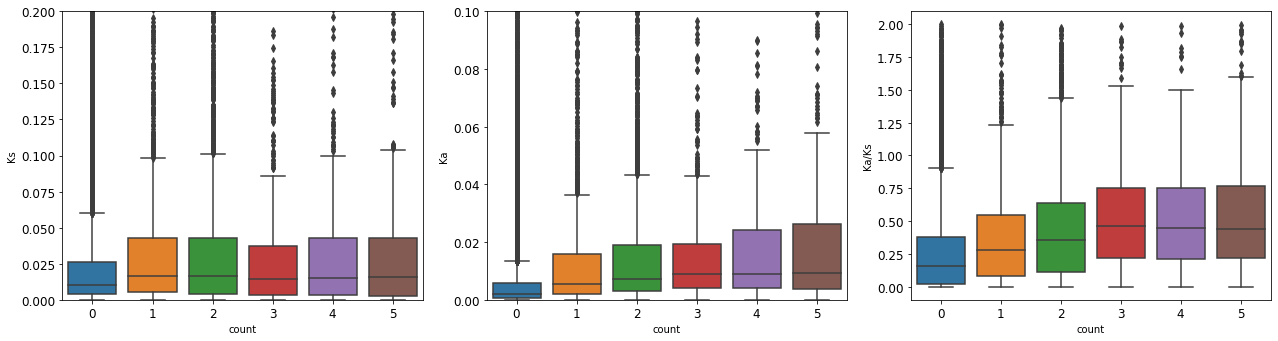

In [60]:
fig, axes = plt.subplots(1,3,figsize=(18,5))

## set fontsize globally
plt.rcParams['font.size'] = '15'

## Plotting Ks
sns.boxplot(data=df_row_kaks, y="Ks", x="count",ax=axes[0])
axes[0].set_ylim(0,0.2)
#x0=np.arange(0,3.5,0.5)
#axes[0].set_xticks(x0)
#axes[0].xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
#plt.savefig("Ks.png",dpi=600)

## Plotting Ka
sns.boxplot(data=df_row_kaks, y="Ka", x="count",ax=axes[1])
axes[1].set_ylim(0,0.1)
#axes[1].xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
#plt.savefig("Ka.png",dpi=600)

## Plotting Kaks
sns.boxplot(data=df_row_kaks[df_row_kaks["Ka/Ks"]<2], y="Ka/Ks", x="count",ax=axes[2])
#axes[2].set_xlim(0,8)
#x=np.arange(10)
#x=[0, 0.76, 2.17, 4, 6, 8]
#axes[2].set_xticks(x)
#axes[2].xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
#axes[2].set_xticklabels(axes[2].get_xticks(), rotation = 45)

#kwargs={"color":"red","linewidth":1,"linestyle":"--"}
#axes[2].axvline(2.17,**kwargs)
#axes[2].axvline(0.76,**kwargs)

for ax in axes:
    for label in (ax.get_xticklabels() + ax.get_yticklabels()):
        label.set_fontsize(12)

#plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

In [40]:
fig.savefig("Ka_Ks_KaKs_boxplot.png",dpi=300,bbox_inches="tight")